In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import pandas_datareader.data as web
import datetime

In [32]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 4, 30)
tesla = pd.read_csv("TSLA.csv").set_index('Date')

In [33]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


In [34]:
ford=pd.read_csv("F.csv").set_index('Date')

In [35]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,8.064753,45709900
2012-01-04,11.15,11.53,11.07,11.30,8.187930,79725200
2012-01-05,11.33,11.63,11.24,11.59,8.398067,67877500
2012-01-06,11.74,11.80,11.52,11.71,8.485017,59840700
2012-01-09,11.83,11.95,11.70,11.80,8.550230,53981500


In [36]:
gm=pd.read_csv("GM.csv").set_index('Date')

In [37]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,16.818344,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.898247,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,17.713190,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,18.312424,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,18.248503,12084500


Part 2: Visualizing the Data


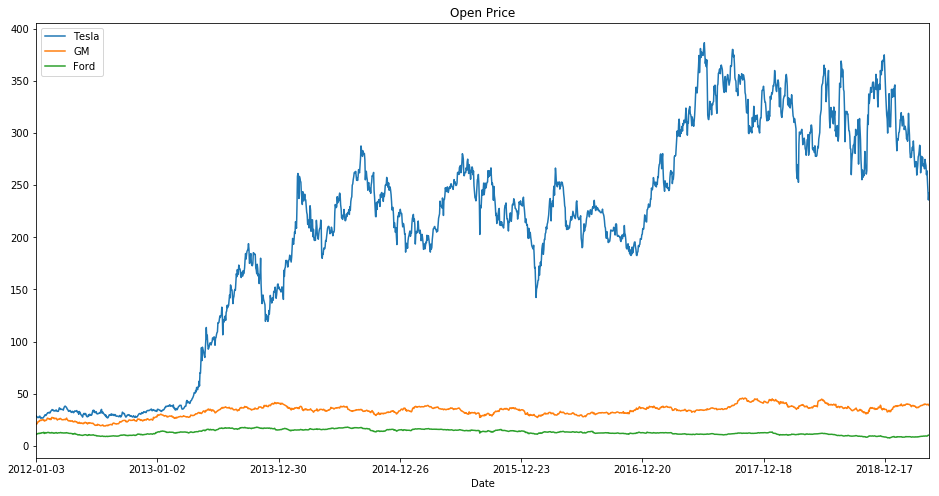

In [38]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

Volume of stock traded each day

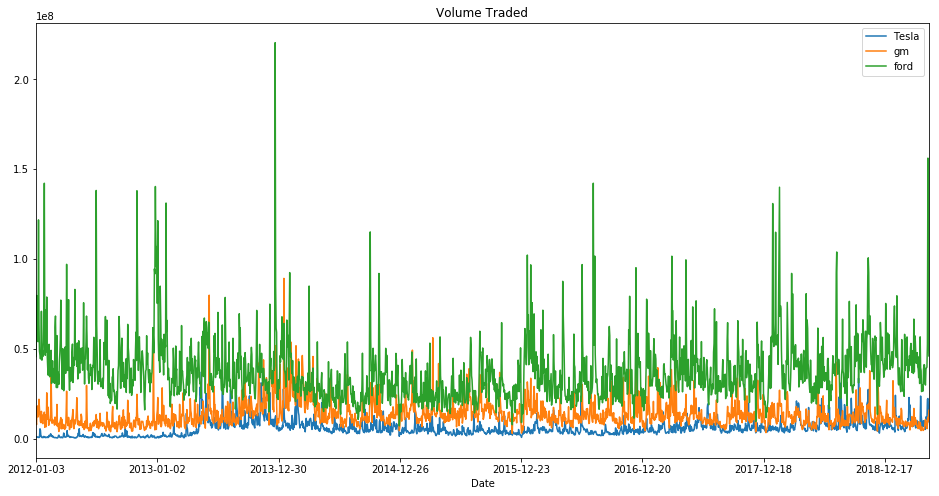

In [39]:
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

Ford had a really big spike sometime in 2013. What happened that day?
Ford's shares fell sharply due to the cost of launching a record number of new vehicles and continuing troubles in Europe.

In [40]:
ford['Volume'].argmax()

C:\Users\siris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'2013-12-18'

The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately the current data doesn't have that information of total units of stock present. But what we can do is a simple calcualtion to try to represent total money traded would be to multiply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series.

Total Trade:

In [48]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

In [49]:
len(tesla['Total Traded'])

1842

Text(0, 0.5, 'Total Traded')

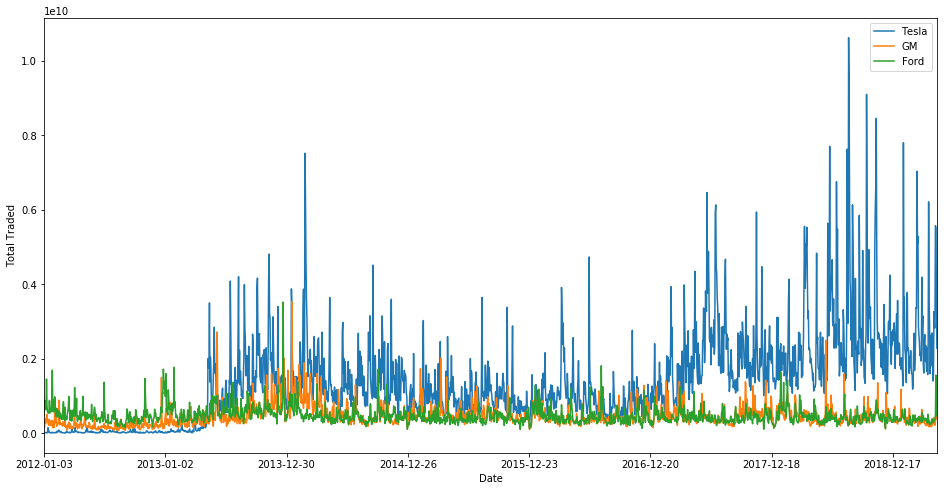

In [50]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

 Looks like there was huge amount of money traded for Tesla somewhere in 2018. What date was that and what happened? 

In [51]:
tesla['Total Traded'].argmax()

C:\Users\siris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


'2018-08-07'

Elon Musk announced that he was considering taking Tesla private at a price of $420/share, this caused an uproar. Shares soared on the news, and although briefly halted by the Nasdaq, resumed trading, ultimately rising more than 10%. This resulted in huge trading of the Tesla stock, but the company never went private.

Moving Averages:

 Plot out the MA50 and MA200 for GM

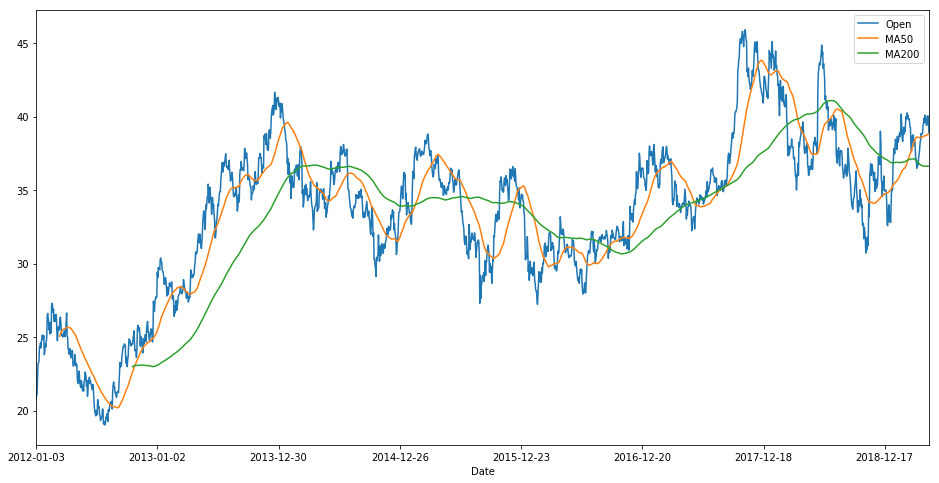

In [55]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open','MA50','MA200']].plot(label='gm',figsize=(16,8))

 Plot out the MA50 and MA200 for Tesla:

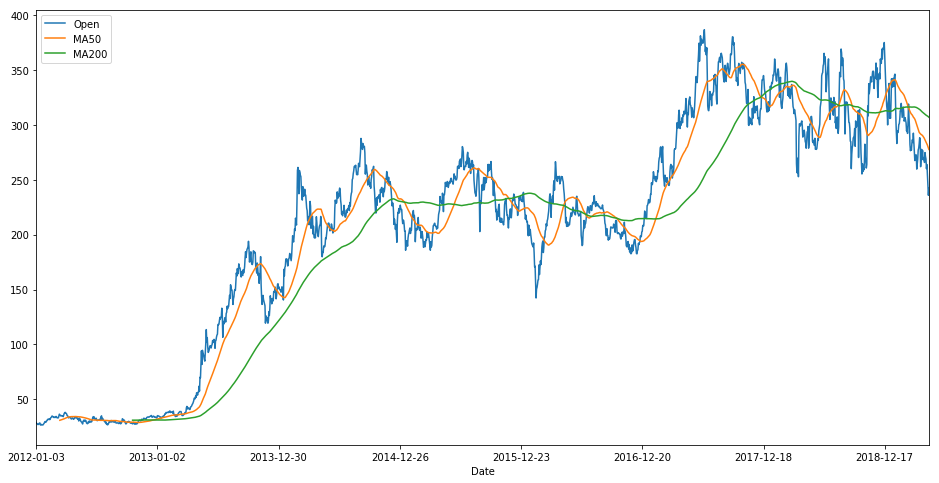

In [56]:
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','MA50','MA200']].plot(label='tesla',figsize=(16,8))

 Plot out the MA50 and MA200 for Tesla:

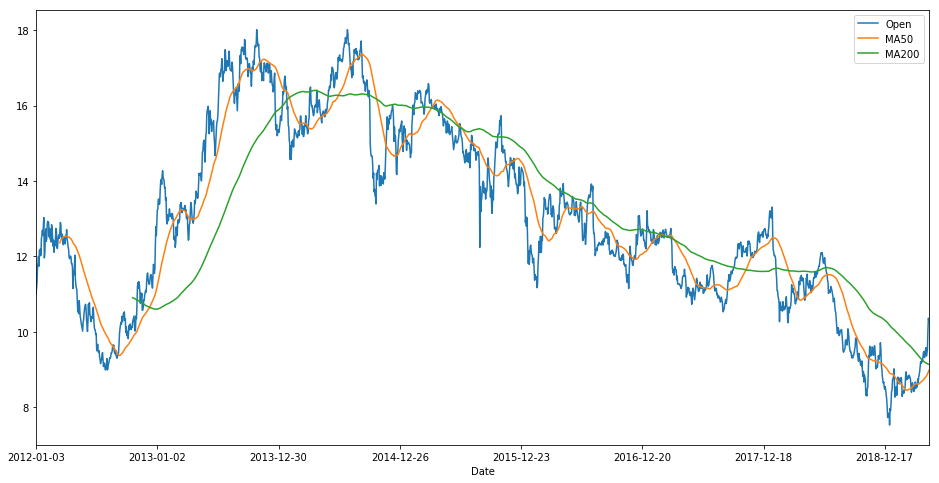

In [57]:
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open','MA50','MA200']].plot(label='ford',figsize=(16,8))

Scatter Matrix Plot:
We can see if there is a relationship between these stocks using scatter matrix plot since they are all related to the car industry.

In [64]:
from pandas.plotting import scatter_matrix

In [65]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [66]:
car_comp.corr()

,Open,Open,Open
Open,1.000000,0.749235,-0.133283
Open,0.749235,1.000000,0.201197
Open,-0.133283,0.201197,1.000000


In [67]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

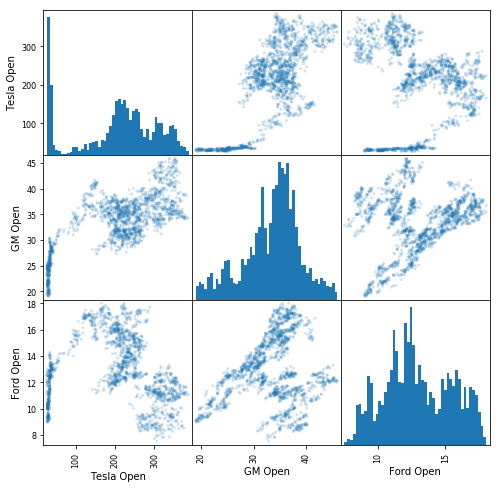

In [70]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

**Part 2: Financial Analysis:

**Daily Percentage Change:

Daily percentage change is defined by the following formula:

Return@t = [Price@t/Price@(t-1)] - 1


This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!


**Creating a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method.

In [71]:
#Shift Method:
tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1) ) - 1

In [72]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100,2.685921e+07,NaN,NaN,NaN
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100,1.777512e+07,NaN,NaN,-0.013177
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500,2.791268e+07,NaN,NaN,-0.021292
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300,2.682736e+07,NaN,NaN,-0.007743
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000,2.421900e+07,NaN,NaN,0.012635


In [73]:
#For GM:
gm['returns'] = (gm['Close'] / gm['Close'].shift(1) ) - 1

In [74]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,16.818344,9321300,1.941627e+08,NaN,NaN,NaN
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.898247,7856700,1.653835e+08,NaN,NaN,0.004751
2012-01-05,21.100000,22.290001,20.959999,22.170000,17.713190,17880600,3.772807e+08,NaN,NaN,0.048227
2012-01-06,22.260000,23.030001,22.240000,22.920000,18.312424,18234500,4.059000e+08,NaN,NaN,0.033829
2012-01-09,23.200001,23.430000,22.700001,22.840000,18.248503,12084500,2.803604e+08,NaN,NaN,-0.003490


In [75]:
#For Ford:
ford['returns'] = (ford['Close'] / ford['Close'].shift(1) ) - 1

In [76]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,8.064753,45709900,502808900.0,NaN,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,8.187930,79725200,888935980.0,NaN,NaN,0.015274
2012-01-05,11.33,11.63,11.24,11.59,8.398067,67877500,769052075.0,NaN,NaN,0.025664
2012-01-06,11.74,11.80,11.52,11.71,8.485017,59840700,702529818.0,NaN,NaN,0.010354
2012-01-09,11.83,11.95,11.70,11.80,8.550230,53981500,638601145.0,NaN,NaN,0.007686


Plotting a histogram of each companies returns,we can either do them separately, or stack them on top of each other. We can check which stock is the most volatile by the variance in the daily returns.

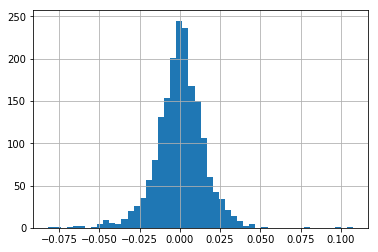

In [77]:
ford['returns'].hist(bins=50)

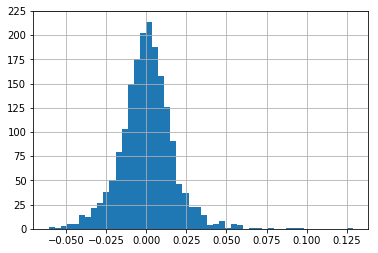

In [78]:
gm['returns'].hist(bins=50)

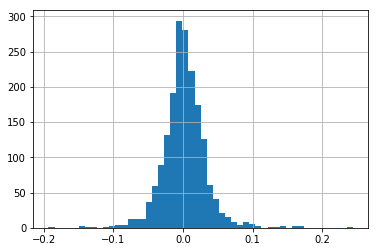

In [79]:
tesla['returns'].hist(bins=50)

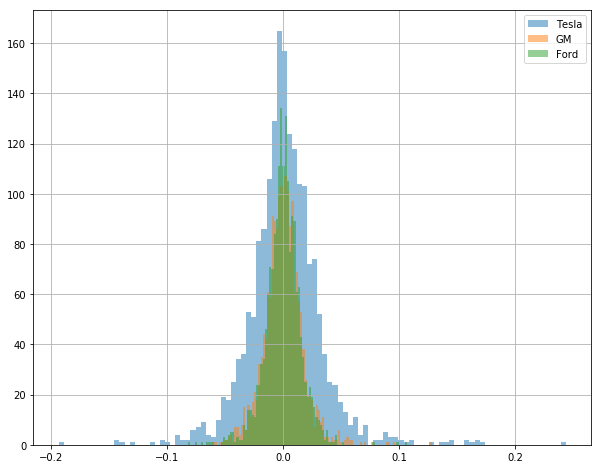

In [85]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

 Can also plotting a KDE instead of histograms for another view point to know Which stock has the widest plot. 

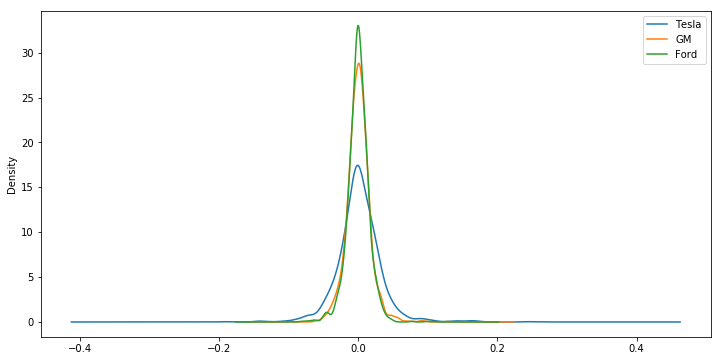

In [87]:
tesla['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
gm['returns'].plot(kind='kde',label='GM')
ford['returns'].plot(kind='kde',label='Ford')
plt.legend()

Creating some box plots to compare the returns.

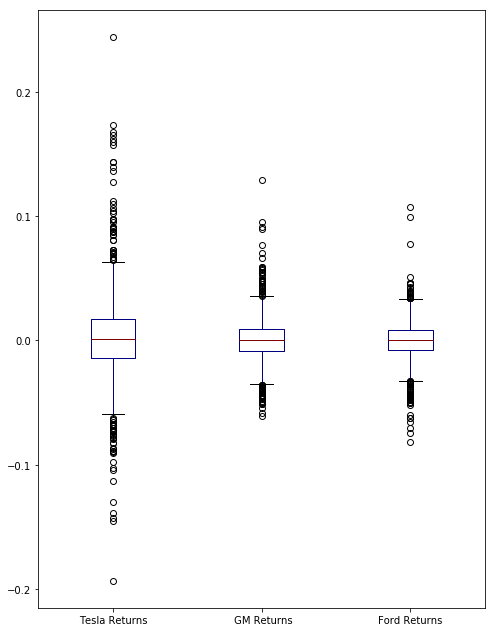

In [88]:
box_df = pd.concat([tesla['returns'],gm['returns'],ford['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

**Comparing Daily Returns between Stocks:

Creating a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?

In [90]:
box_df.corr()

,Tesla Returns,GM Returns,Ford Returns
Tesla Returns,1.000000,0.216542,0.226830
GM Returns,0.216542,1.000000,0.666604
Ford Returns,0.226830,0.666604,1.000000


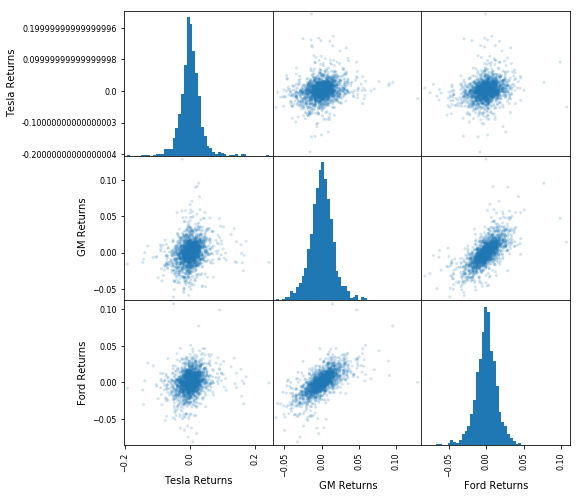

In [89]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely.

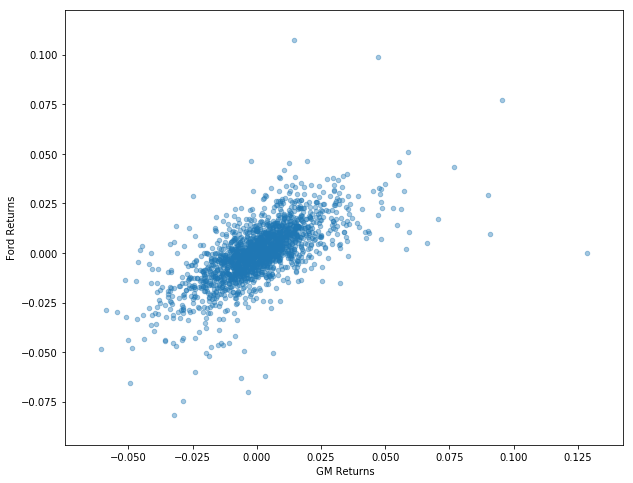

In [91]:
box_df.plot(kind='scatter',x=' GM Returns',y='Ford Returns',alpha=0.4,figsize=(10,8))

**Cumulative Daily Returns:

Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. The simple calculation here won't take into account stocks that give back a dividend.

**Example:


Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given.

Date                        Price
01/01/2018                   10
01/02/2018                   15
01/03/2018                   20
01/04/2018                   25

* Daily Return : Daily return is the profit/loss made by the stock compared to the previous day. (This is what we just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

Date                         Daily Return                  %Daily Return
01/01/2018                 10/10 =  1                          -   
01/02/2018                 15/10 =  3/2                       50%
01/03/2018                 20/15 =  4/3                       33%
01/04/2018                 25/20 =  5/4                       20%


* Cumulative Return: While daily returns are useful, it doesn't give the investor an immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

Date                       Cumulative Return         %Cumulative Return
01/01/2018                  10/10 =  1                         100 %   
01/02/2018                  15/10 =  3/2                       150 %
01/03/2018                  20/10 =  2                         200 %
01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:
𝑖@i = (1+r@t) * i@t-1

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Cumulative daily returns is easy to calculate with cumprod() method. Using something in the following manner:
df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()

**Creating a cumulative daily return column for each car company's dataframe.

In [92]:
tesla['Cumulative Return'] = (1 + tesla['returns']).cumprod()

In [93]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100,2.685921e+07,NaN,NaN,NaN,NaN
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100,1.777512e+07,NaN,NaN,-0.013177,0.986823
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500,2.791268e+07,NaN,NaN,-0.021292,0.965812
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300,2.682736e+07,NaN,NaN,-0.007743,0.958333
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000,2.421900e+07,NaN,NaN,0.012635,0.970442


In [95]:
ford['Cumulative Return'] = (1 + ford['returns']).cumprod()
ford.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,8.064753,45709900,502808900.0,NaN,NaN,NaN,NaN
2012-01-04,11.15,11.53,11.07,11.30,8.187930,79725200,888935980.0,NaN,NaN,0.015274,1.015274
2012-01-05,11.33,11.63,11.24,11.59,8.398067,67877500,769052075.0,NaN,NaN,0.025664,1.041330
2012-01-06,11.74,11.80,11.52,11.71,8.485017,59840700,702529818.0,NaN,NaN,0.010354,1.052111
2012-01-09,11.83,11.95,11.70,11.80,8.550230,53981500,638601145.0,NaN,NaN,0.007686,1.060198


In [96]:
gm['Cumulative Return'] = (1 + gm['returns']).cumprod()
gm.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,16.818344,9321300,1.941627e+08,NaN,NaN,NaN,NaN
2012-01-04,21.049999,21.370001,20.750000,21.150000,16.898247,7856700,1.653835e+08,NaN,NaN,0.004751,1.004751
2012-01-05,21.100000,22.290001,20.959999,22.170000,17.713190,17880600,3.772807e+08,NaN,NaN,0.048227,1.053207
2012-01-06,22.260000,23.030001,22.240000,22.920000,18.312424,18234500,4.059000e+08,NaN,NaN,0.033829,1.088836
2012-01-09,23.200001,23.430000,22.700001,22.840000,18.248503,12084500,2.803604e+08,NaN,NaN,-0.003490,1.085036


**Plotting the Cumulative Return columns against the time series index. Which stock showed the highest return for a 1$ invested? Which showed the lowest?

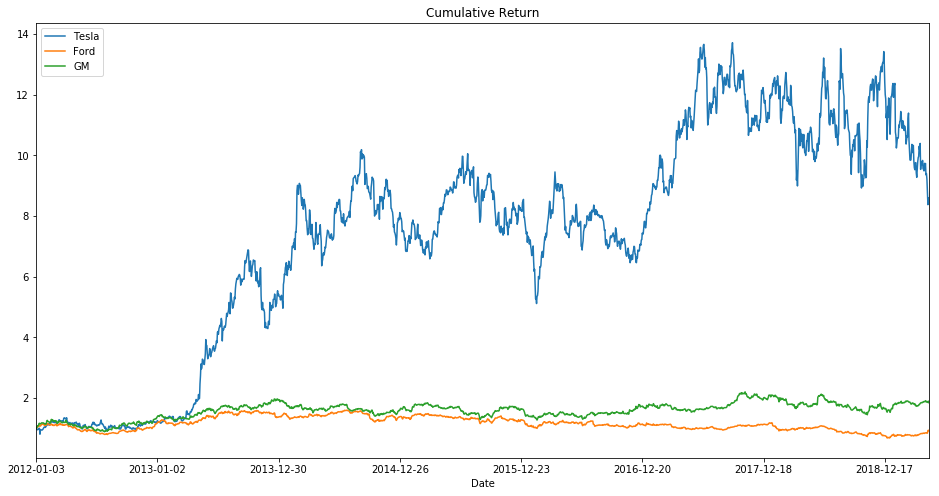

In [98]:
tesla['Cumulative Return'].plot(label='Tesla',figsize=(16,8),title='Cumulative Return')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()